In [1]:
from tensorflow.keras.layers import Input , Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

from keras.preprocessing.image import img_to_array

In [2]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2

In [3]:
SIZE=256

In [4]:
np.random.seed(420)

In [5]:
img_data=[]
img= cv2.imread('laser monalisa.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=cv2.resize(img, (SIZE, SIZE))

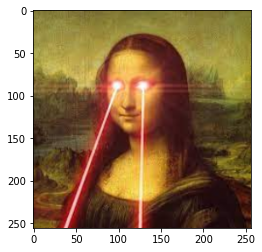

In [6]:
imshow(img)


In [7]:
img

array([[[123, 115,  50],
        [125, 117,  52],
        [115, 107,  42],
        ...,
        [119, 114,  45],
        [118, 113,  42],
        [114, 106,  33]],

       [[127, 119,  54],
        [125, 117,  52],
        [120, 112,  47],
        ...,
        [121, 116,  47],
        [120, 116,  44],
        [117, 111,  37]],

       [[133, 125,  60],
        [127, 119,  54],
        [127, 118,  53],
        ...,
        [124, 120,  49],
        [124, 119,  46],
        [123, 117,  44]],

       ...,

       [[116,  94,  32],
        [113,  91,  27],
        [120,  98,  32],
        ...,
        [ 64,  32,  14],
        [ 81,  48,  28],
        [ 87,  50,  26]],

       [[116,  92,  30],
        [109,  85,  22],
        [110,  86,  21],
        ...,
        [ 66,  34,  16],
        [ 80,  47,  26],
        [ 76,  38,  16]],

       [[113,  87,  28],
        [110,  84,  24],
        [108,  81,  21],
        ...,
        [ 70,  38,  22],
        [ 71,  38,  20],
        [ 74,  37,  18]]

In [8]:
img_data.append(img_to_array(img))

img_array= np.reshape(img_data, (len(img_data),SIZE,SIZE,3))
img_array= img_array.astype('float32')/255.
print(' \n\n img only original \n',img)
print(' \n\n img data  \n\n',img_data)
print(' \n\n img array  \n\n',img_array)

 

 img only original 
 [[[123 115  50]
  [125 117  52]
  [115 107  42]
  ...
  [119 114  45]
  [118 113  42]
  [114 106  33]]

 [[127 119  54]
  [125 117  52]
  [120 112  47]
  ...
  [121 116  47]
  [120 116  44]
  [117 111  37]]

 [[133 125  60]
  [127 119  54]
  [127 118  53]
  ...
  [124 120  49]
  [124 119  46]
  [123 117  44]]

 ...

 [[116  94  32]
  [113  91  27]
  [120  98  32]
  ...
  [ 64  32  14]
  [ 81  48  28]
  [ 87  50  26]]

 [[116  92  30]
  [109  85  22]
  [110  86  21]
  ...
  [ 66  34  16]
  [ 80  47  26]
  [ 76  38  16]]

 [[113  87  28]
  [110  84  24]
  [108  81  21]
  ...
  [ 70  38  22]
  [ 71  38  20]
  [ 74  37  18]]]
 

 img data  

 [array([[[123., 115.,  50.],
        [125., 117.,  52.],
        [115., 107.,  42.],
        ...,
        [119., 114.,  45.],
        [118., 113.,  42.],
        [114., 106.,  33.]],

       [[127., 119.,  54.],
        [125., 117.,  52.],
        [120., 112.,  47.],
        ...,
        [121., 116.,  47.],
        [120., 116.,

In [9]:
model =Sequential()

#downsampling
model.add(Conv2D(32, (3,3), activation= 'relu', padding ='same', input_shape= (SIZE,SIZE,3) ))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(8, (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(8, (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2),padding= 'same'))

#upsampling
model.add(Conv2D(8, (3,3), activation= 'relu', padding ='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(8, (3,3), activation= 'relu', padding= 'same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(3, (3,3), activation= 'relu', padding= 'same'))

model.compile(optimizer= 'adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0

In [10]:
model.fit(img_array, img_array, epochs=500, shuffle= True)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.1714 - accuracy: 0.9836
Epoch 2/500
1/1 [==============================] - 0s 218ms/step - loss: 0.1712 - accuracy: 0.9729
Epoch 3/500
1/1 [==============================] - 0s 256ms/step - loss: 0.1699 - accuracy: 0.9508
Epoch 4/500
1/1 [==============================] - 0s 228ms/step - loss: 0.1658 - accuracy: 0.9487
Epoch 5/500
1/1 [==============================] - 0s 232ms/step - loss: 0.1615 - accuracy: 0.9724
Epoch 6/500
1/1 [==============================] - 0s 360ms/step - loss: 0.1556 - accuracy: 0.9759
Epoch 7/500
1/1 [==============================] - 0s 319ms/step - loss: 0.1465 - accuracy: 0.9788
Epoch 8/500
1/1 [==============================] - 0s 361ms/step - loss: 0.1332 - accuracy: 0.9824
Epoch 9/500
1/1 [==============================] - 0s 341ms/step - loss: 0.1149 - accuracy: 0.9862
Epoch 10/500
1/1 [==============================] - 0s 403ms/step - loss: 0.0913 - accuracy: 0.9879
Epoch 11/500

In [11]:
pred= model.predict(img_array)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


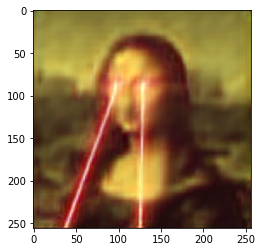

In [12]:
imshow(pred[0].reshape(SIZE,SIZE,3))

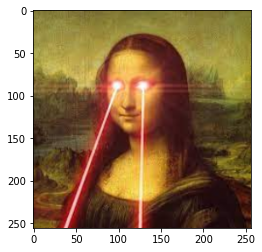

In [13]:
imshow(img)